<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

### Notebook 1/4: Preliminary EDA of 'train' dataset 

Notebook 1: Preliminary EDA of 'train' dataset .<br>
Notebook 2: Cleaning and Modfications of 'train' and 'test' datasets.<br>
Notebook 3: Preprocessing and Feature Engineering.<br>
Notebook 4: Modeling.

### Goal

To accurately predict the home prices in Ames by using regression modelling. 

Data description can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
train = pd.read_csv('../datasets/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Exploratory Visualizations

In [4]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [5]:
# Create mask for numeric and categorical features
num_features = [col for col in train._get_numeric_data().columns]
cat_features = [col for col in train.select_dtypes(include=['object']).columns]

#### Scatter Plot for numeric features

In [6]:
# function for plotting of numeric features

def eda_scatter(dataframe, list_of_columns, target):    
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (14, nrows*2.5))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        sns.regplot(data = dataframe, x = column, y = target, ax = ax[i], ci = None, color = 'skyblue', line_kws = {'color': 'blue'})
        ax[i].set_title(column, fontsize = 14)
        ax[i].set_xlabel('')
        plt.tight_layout()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Scatterplot of Numeric Features vs Sale Price', fontsize = 20, y = 1.015)

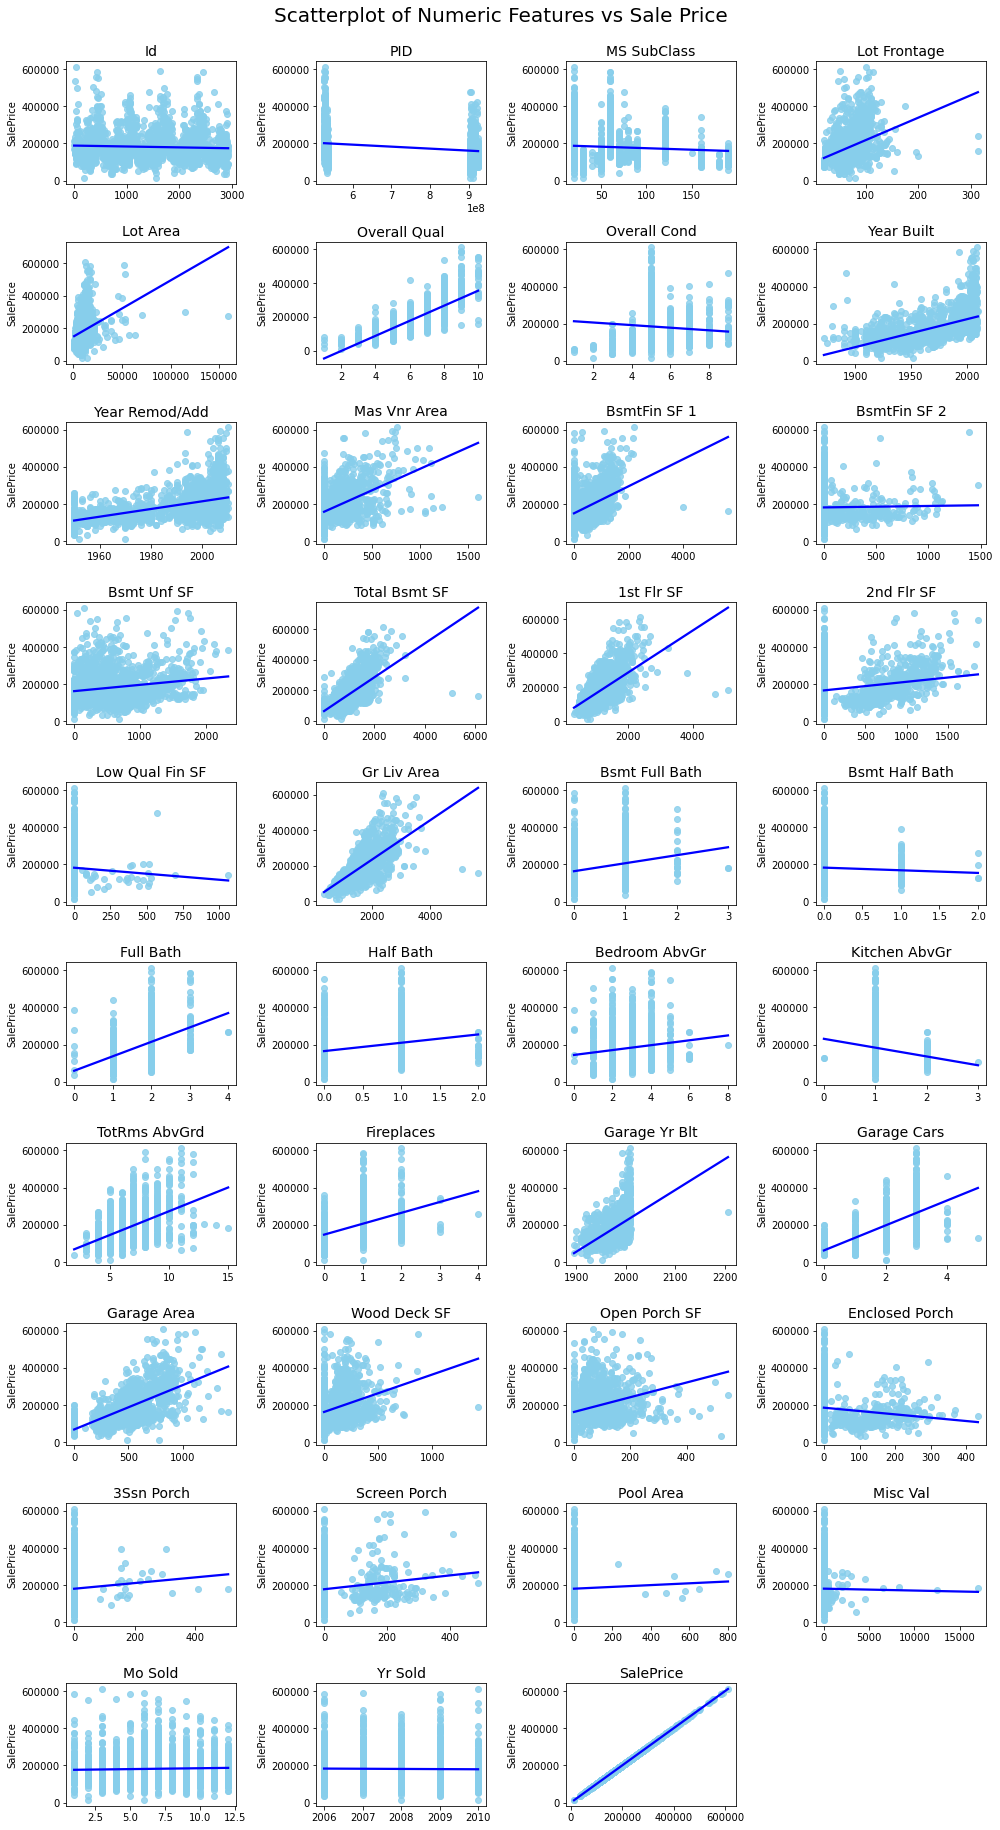

In [7]:
eda_scatter(train, num_features, 'SalePrice')

Based on the scatterplots above, there are some points to note:

Firstly, we can note that there are some features that appear to have a strong positive relationship with `SalePrice`. For example, `Garage Area` and `Overall Qual`. It was also noted that houses with a higher number of a specific property feature such as `Full Bath` and `Fireplaces` tend to have a higher sale price. 

Whiel we can also note that features involving square footage also generally have a strong correlation with `SalePrice`, there are some features such as `Lot Frontage`, `Lot Area` and `Gr Liv Area` with obvious outliers. This may represent some abnormally large houses within the region. 

However, while it was generally assumed that a younger/newer house would tend to have higher prices, it seems that in this dataset the age related features such as the `Year Built` and `Year Remod/Add` did not display the expected strength in correlation with a weaker display in correlation as compared to the features involving square footage. 

One interesting feature to note is the `Overall Cond` feature which has a slight negative correlation with `SalePrice`. This implies that houses with better condition ratings tend to have a lower sale prices which is actually contrary to the common belief that a younger/newer house will have a higher sale price. 

Time based features such as `Mo Sold` and `Yr Sold` on the other hand, seem to have no correlation with `SalePrice`with prices remaining relatively constant throughout. 


#### Histogram for numeric features

In [8]:
# Function for plotting of numeric features
def eda_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols = ncols,figsize = (14, nrows*2.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.histplot(data = dataframe, x = dataframe[column], kde = False, ax = ax[i], fill = False)
        ax[i].set_title(column,fontsize = 14)
        ax[i].set_xlabel('')
        ax[i].tick_params(labelsize=10)
    plt.tight_layout(h_pad = -0.4, w_pad = -0.4)
    
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1
        
    plt.suptitle('Histograms of Numeric Features', fontsize=20, y=1.015)

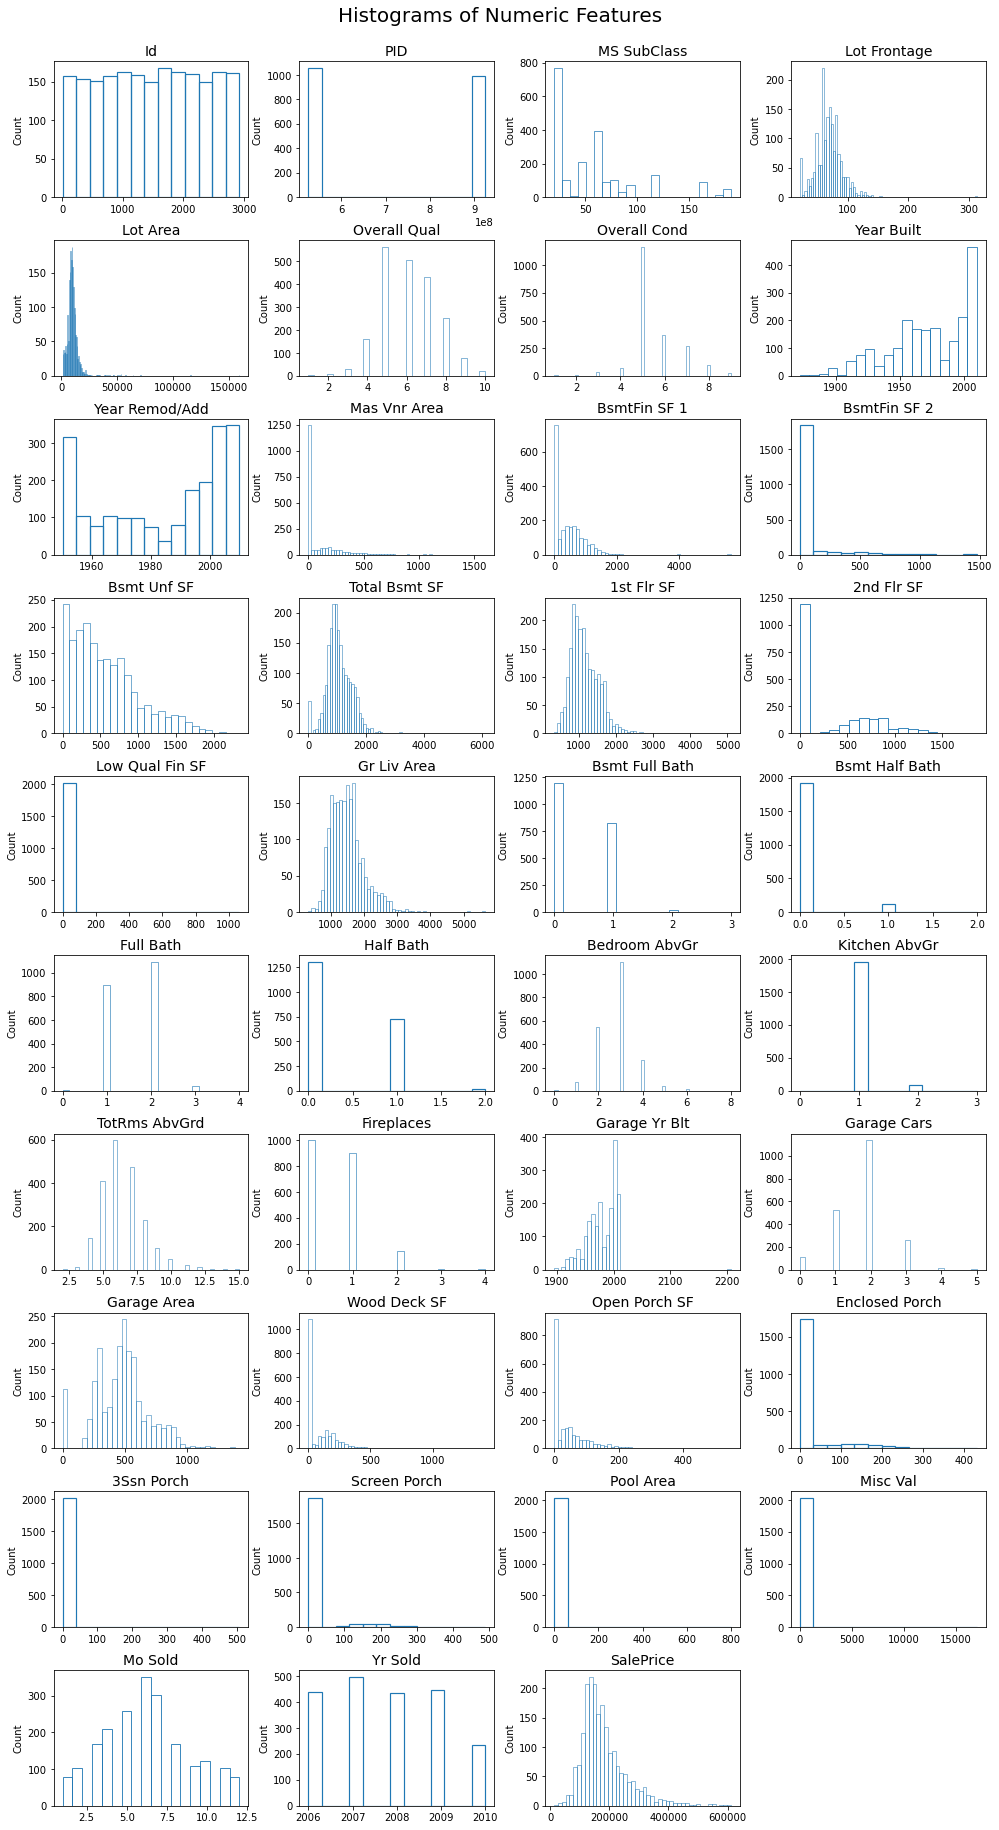

In [9]:
# Histograms of numeric data
eda_histograms(train, num_features)

Looking at the distribution of features, it is noted that many features are significantly right-skewed. For example, features involving square footage (eg. `Gr Liv Area`) and the target variable `SalePrice`. 

However, it is noted that some time based features seem to be skewed to the left instead as seem in `Year Built`.  

There are also features with minimal variance such as `Pool Area` and `Misc Val` which may indicate that these features may not be as effective in predicting sale price. 

#### Boxplot of Categorical Features

In [18]:
# Function for plotting of categorical features
def eda_boxplotter(dataframe, list_of_columns, target):    
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, 40))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        g = sns.boxplot(data = dataframe, y = column, x = target, ax = ax[i], orient = 'h')
        ax[i].set_title(column, fontsize = 16)
        g.set(xlabel = None)
        g.set(ylabel = None)
        g.set(xticks = [0, 100000, 200000, 300000, 400000, 500000, 600000])
        g.set(xticklabels = ['0k','100k','200k','300k','400k','500k','600k'])
        plt.tight_layout()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Categoric Features vs Sale Price', fontsize=30, y=1.015)

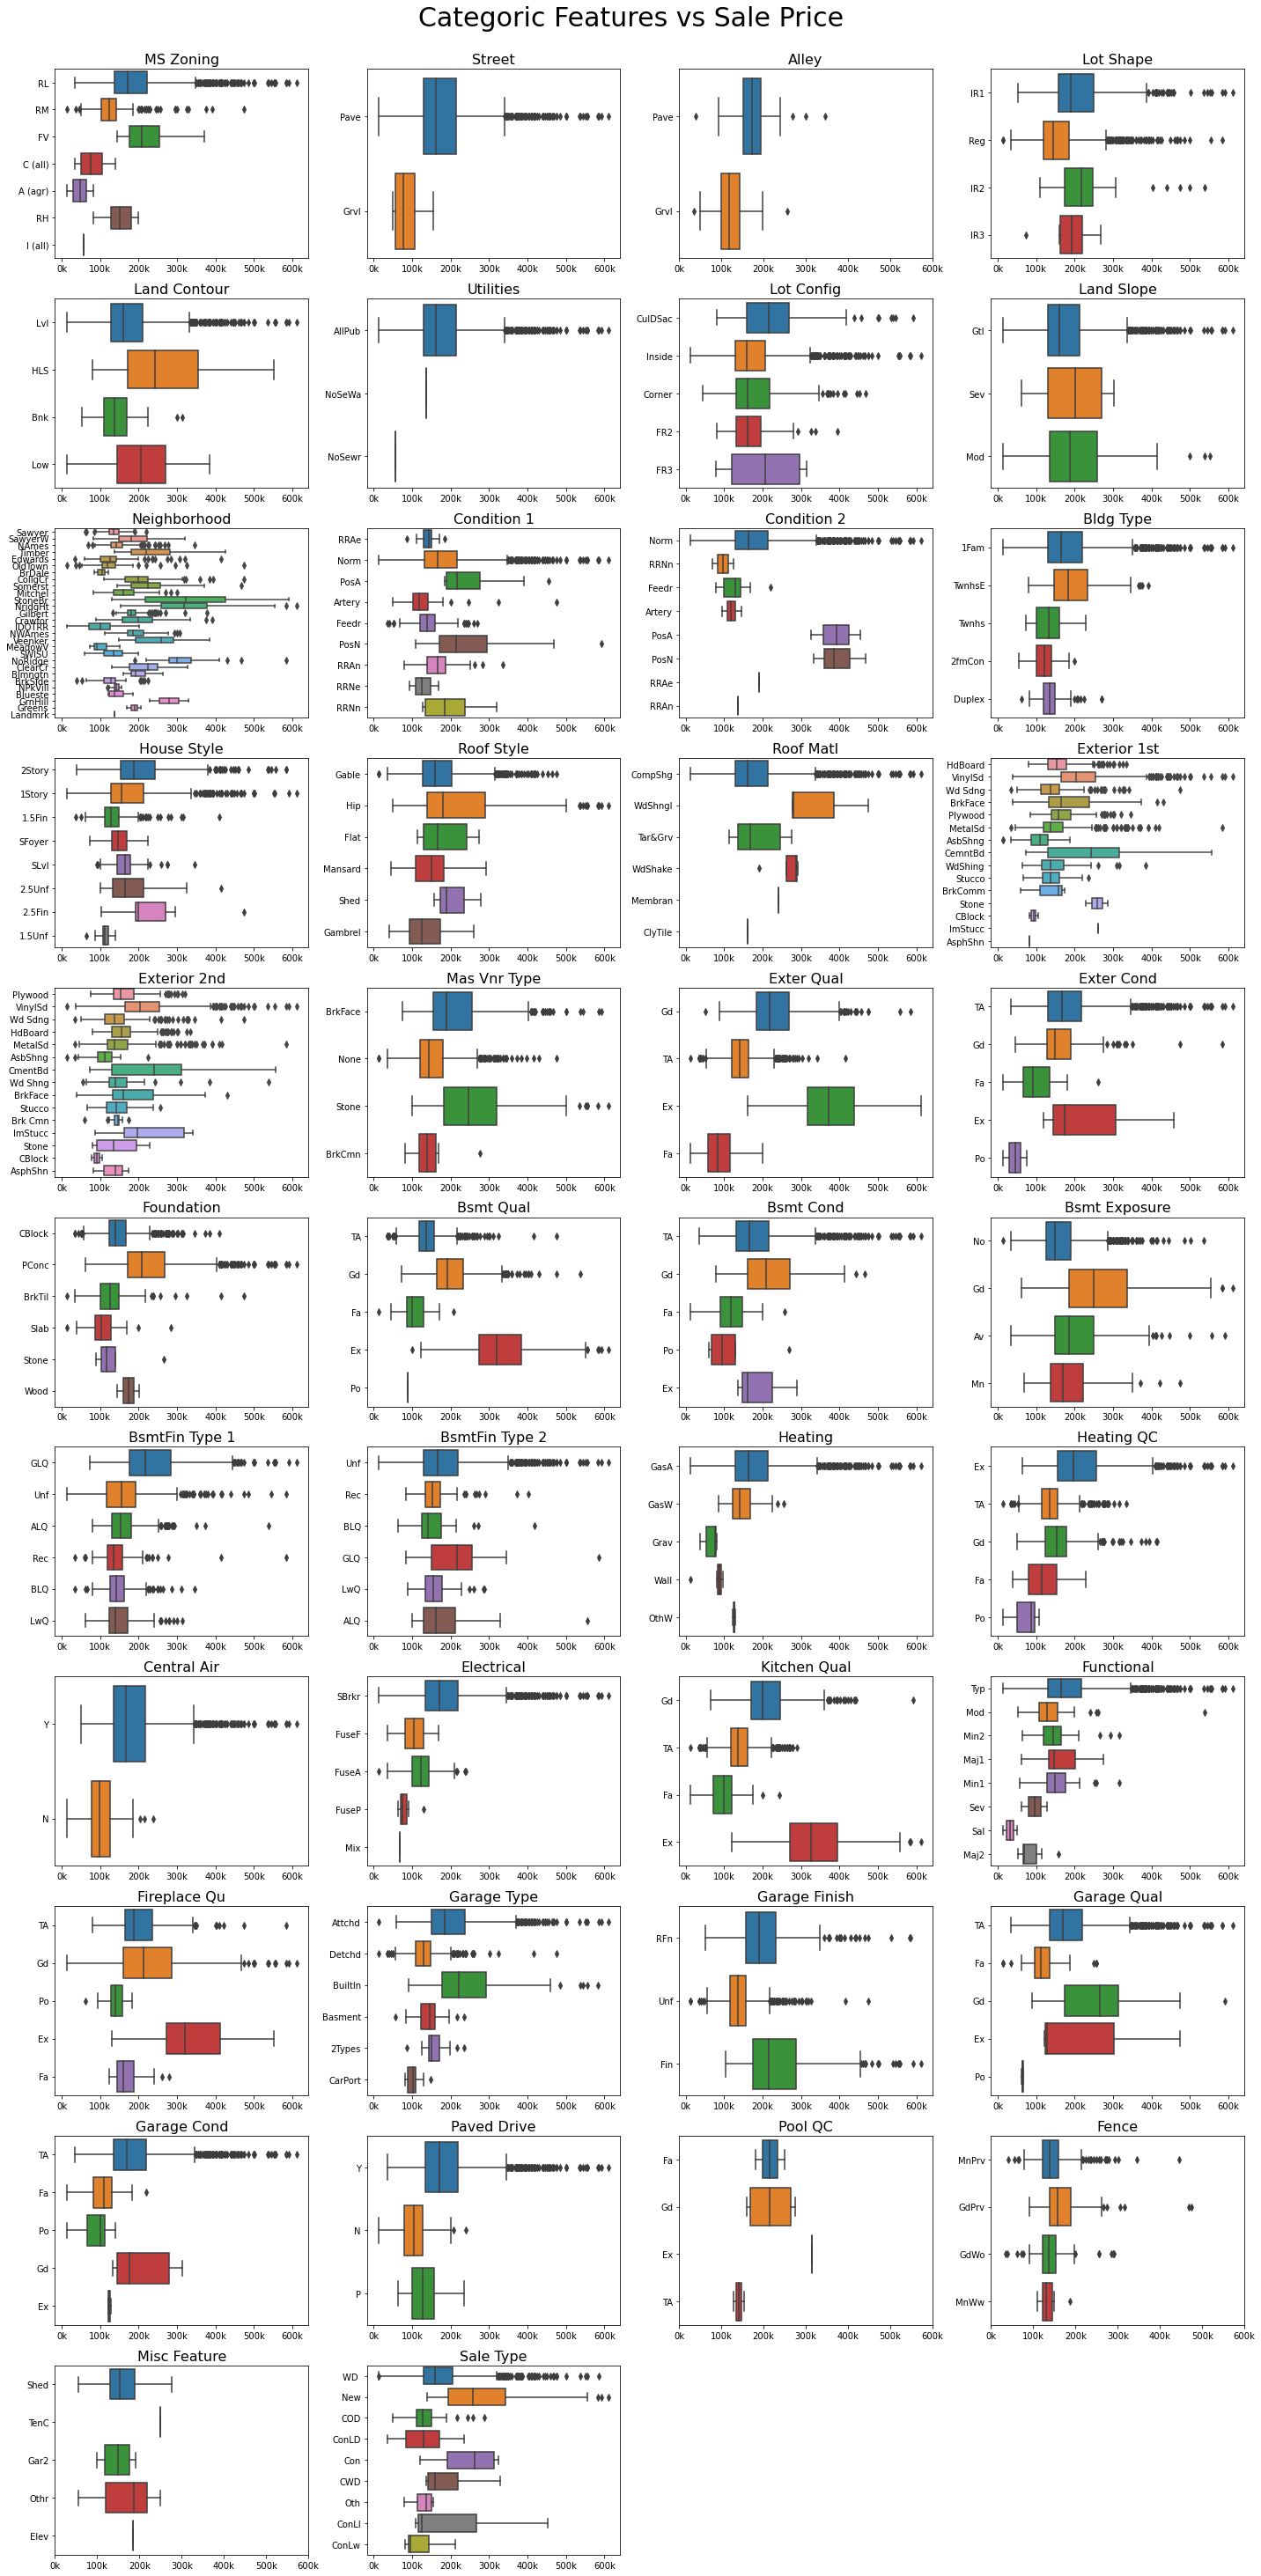

In [19]:
eda_boxplotter(train, cat_features, 'SalePrice')

From the boxplots above, there are several features that have a clear relationship with the sale price. For example houses with `Central Air` (Yes) have a higher sale price for all quartiles as compared to houses with no central air conditioning. Also, houses with a `Paved Drive` (Yes/Partial) have a higer median price along with houses with typical functionality based on the `Functional` plot. 

Text(0.5, 0, 'Neighborhood')

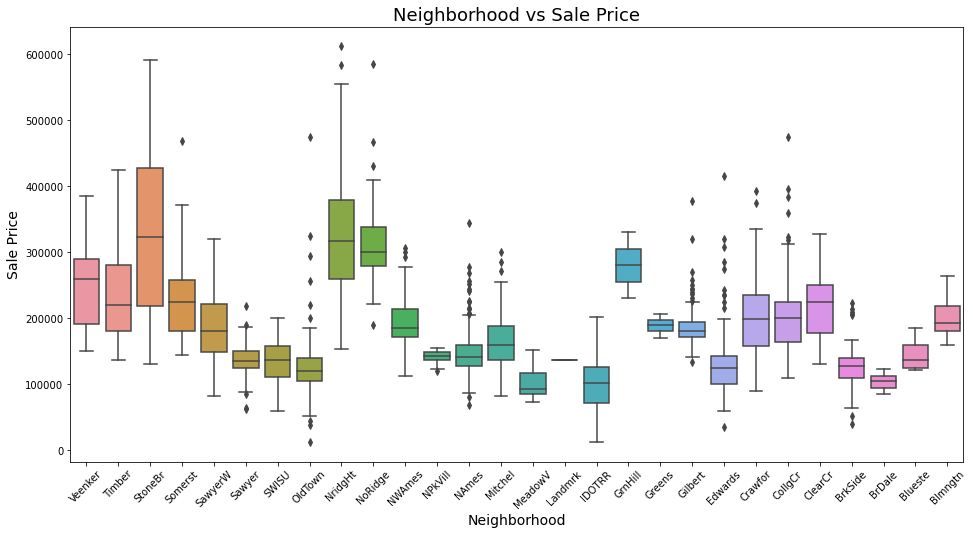

In [13]:
plt.figure(figsize = (16, 8))
sns.boxplot(data = train, x = train['Neighborhood'].sort_values(ascending=False), y='SalePrice')
plt.xticks(rotation = 45);
plt.title('Neighborhood vs Sale Price', fontsize = 18)
plt.ylabel('Sale Price', fontsize = 14)
plt.xlabel('Neighborhood', fontsize = 14)

When zooming in on the `Neighborhood` boxplot, it was interesting to note that several neighborhoods such as `StoneBr`, `NridgeHt`, `NoRidge` and `GrnHill` had significantly higher median sale prices as compared to the rest. 

While this was true, it was also noted that out of the 4 neighbourhoods mentioned eariler, only the lowest sale price for `StoneBr` was still similar to that of most of the other neighbourhoods with the other three neighbourhood's lowest price is significantly higher than the majority. 

It was also interesting to note that certain neighbourhoods had a much smaller range of sale prices. This could imply that other features might not have as significant an impact on the sale price as prices within that neighbourhood only falls within a small range. However, this is only an intial assumption. The small range of sale prices could also potentially be due to the houses sold having similar features which then provides a potential avenue for a price differentiation strategy for potential sellers. 

This could potentially imply that the type of neighbourhood might have a significant impact on price. 

#### Strip plots of Categorical Features

In [20]:
# Function for plotting of categorical features
def eda_stripplotter(dataframe, list_of_columns, target):    
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, 40))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        g = sns.stripplot(data = dataframe, y = column, x = target, ax = ax[i], orient = 'h')
        ax[i].set_title(column, fontsize = 16)
        g.set(xlabel = None)
        g.set(ylabel = None)
        g.set(xticks = [0, 100000, 200000, 300000, 400000, 500000, 600000])
        g.set(xticklabels = ['0k','100k','200k','300k','400k','500k','600k'])
        plt.tight_layout()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Categoric Features vs Sale Price', fontsize=30, y=1.015)

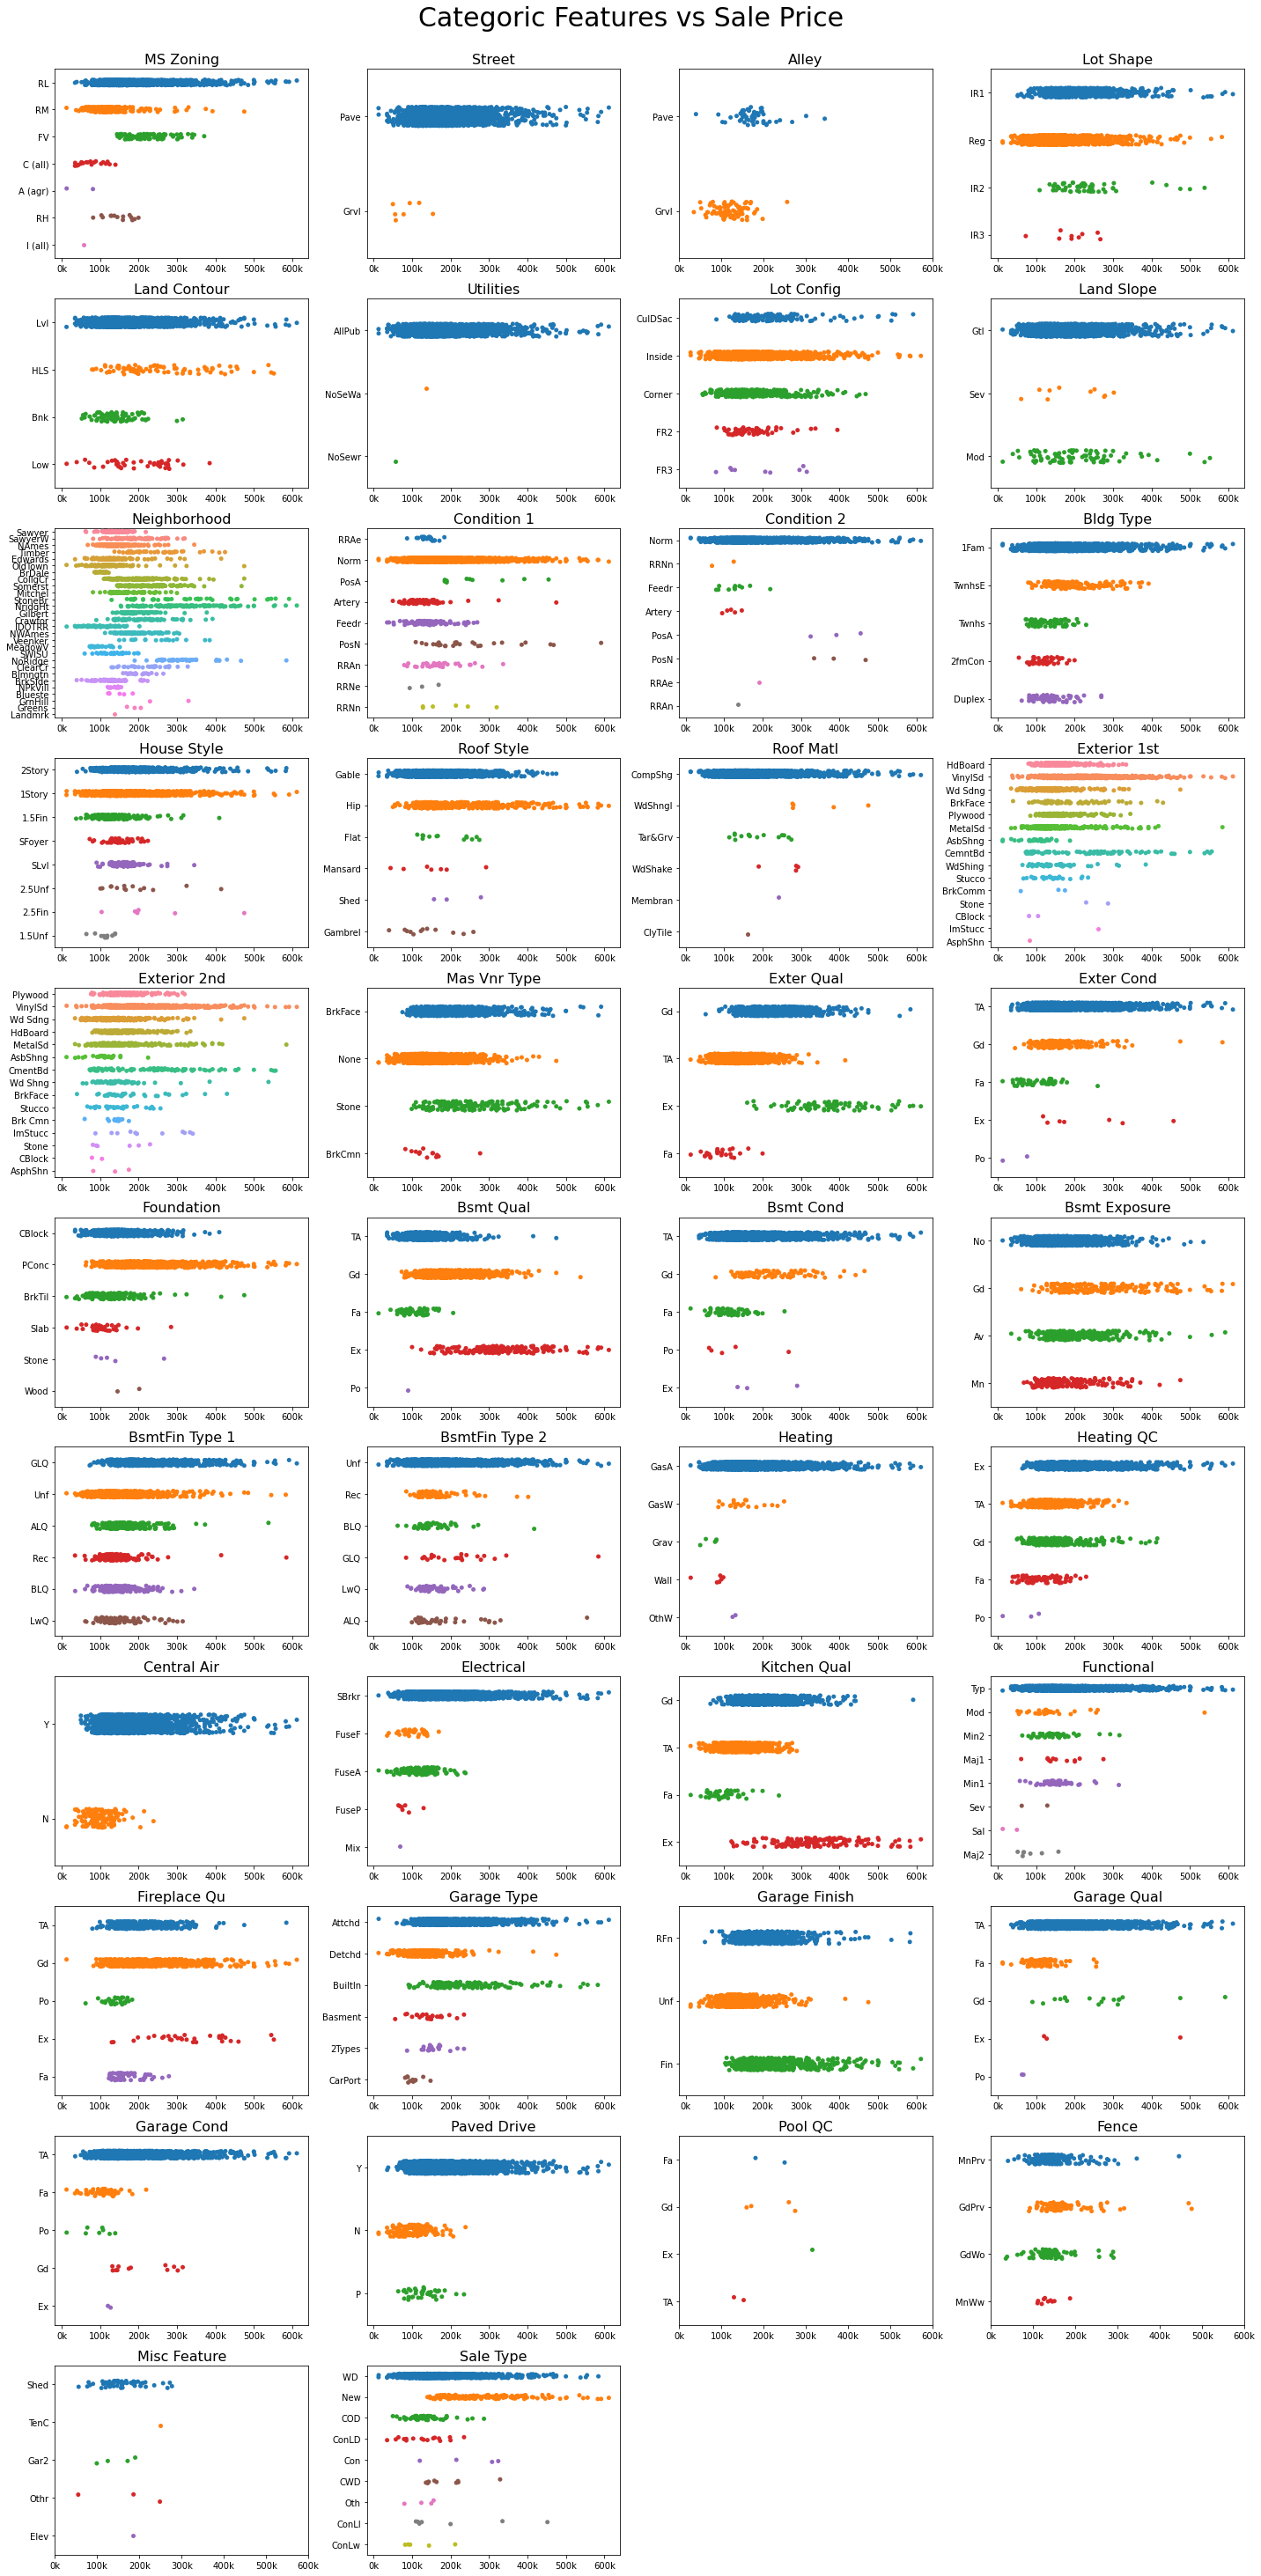

In [21]:
eda_stripplotter(train, cat_features, 'SalePrice')

Using a strip plot, we can see the distribution of the categorical features more clearly. For example, features like `Street`, `Utilities` and `Roof Matl` have almost all houses landing in one category, showing little to no variance. 

There were also features like `Pool QC` and `Misc Feature` that had very little datapoints and the plotted data points all fell within the same price range. These may be noted as features that could be disregarded for future analyses. 

Text(0.5, 0, 'Neighborhood')

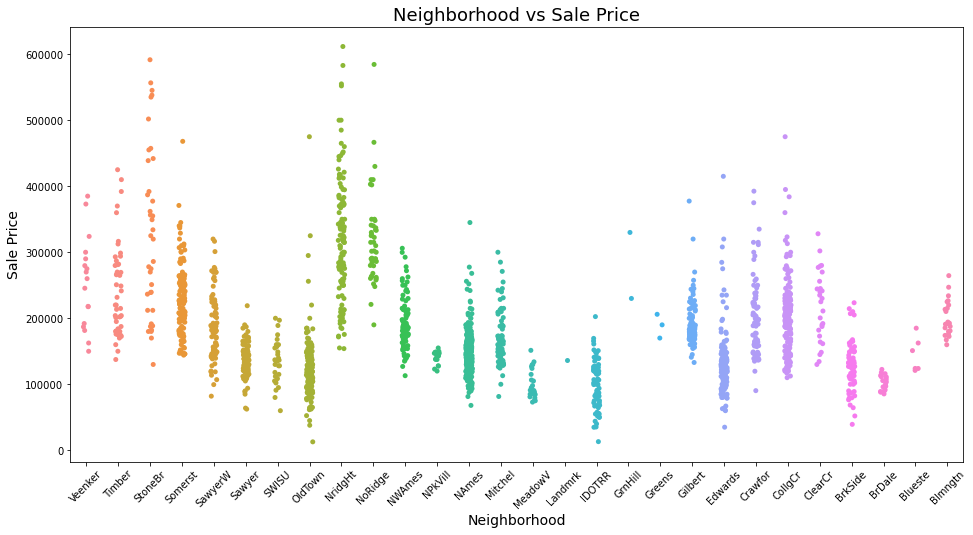

In [22]:
plt.figure(figsize = (16, 8))
sns.stripplot(data = train, x = train['Neighborhood'].sort_values(ascending=False), y='SalePrice')
plt.xticks(rotation = 45);
plt.title('Neighborhood vs Sale Price', fontsize = 18)
plt.ylabel('Sale Price', fontsize = 14)
plt.xlabel('Neighborhood', fontsize = 14)

When zooming in on the strip plot for the `Neighborhood` feature, it was noted that there were a few neighbourhoods with an extremely small sample size. For example `NPKVill`, `MeadowV`, `Landmrk`, `GrnHill`, `Greens`, `BrDale` and `Blueste`.  These are variables that are potentially insignificant in the prediction of housing prices. This can also explain the small range observed earlier in the boxplot for certain nieghbourhoods such as `NPKVill`, `Greens` and `Blueste`. 

### Model Feasibility

Multiple linear regression analysis makes several key assumptions:

1. **Linear relationship between the outcome variable and the independent variables.** 

    This is mostly true as majority of the variables are seen to have either a positive or negative linear relationship with `SalePrice` as seen from the scatterplot above. 


2. **Multivariate normality; as multiple regression assumes that the residuals are normally distributed.** 

    Based on the histogram plotted, it was noted that there were a number of variables that were highly skewed. In accordance with this, there will be a need to explore various methods to reduce this skewness to resemble a somewhat normal distribution. We will explore 3 different methods (Log/ Square Root/ Box-Cox Transform) for each of the variables with skewed data in order to determine which is the best as reducing skewness. 
    This is necessary as more reliable predictions are made if the predictors and the target variable are normally distributed


3. **No outliers**

    As seen from the plots above, there are a few variables with outliers. We will work to remove those to improve the model. 


4. **Scaling; it’s a distance-based algorithm, so preditors should be scaled — like with standard scaler**


5. **No collinearity; if there are highly correlated predictors, it’s most likely the model will overfit**

    We will use a heatmap to do a quick check of this below. 

#### Heatmap

In this dataset, there are too many features for us to effectively plot the heatmap for all features. As such, we will only plot the heatmap for the top twenty positively correlated features. 


In [25]:
# Create mask for our top twenty positively correlated features
top_20 = train.corr()['SalePrice'].sort_values(ascending=False).head(20).index

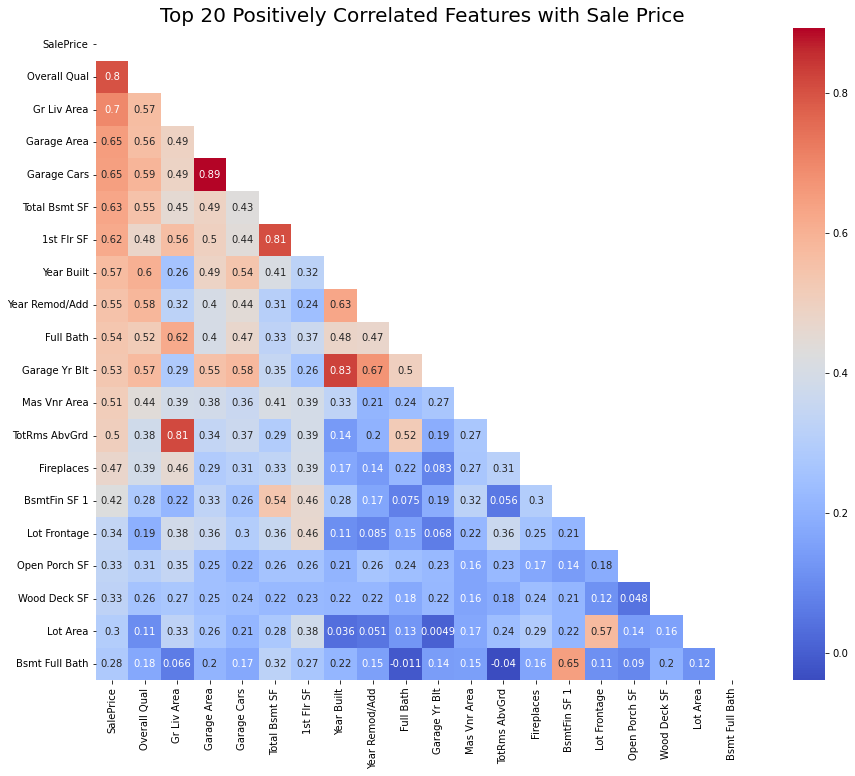

In [28]:
#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(train[top_20].corr(), dtype=bool))
ax = sns.heatmap(train[top_20].corr(), cmap='coolwarm', mask = mask, square=True, annot=True)
plt.title('Top 20 Positively Correlated Features with Sale Price', fontsize=20);

Based on the heatmap above, it seems that there are a number of variables with multicollinearity with a high coefficient of more than 0.8. For example, the `Garage Cars` and `Garage Area` have the highest coefficient of 0.89. This is to be expected as a larger garage area will tend to be able to house more cars. In another case, `Total Bsmt SF` and `1st Flr SF` also ahve a high coefficient of 0.81. This should also be expected as houses with a larger basement area will tend to have a bigger first-floor area as well. Likewise for `TotRms AbvGrd` and `Gr Liv Area`. As for `Garage Yr Blt` and `Year Built`, it is also logically expected for the two to have a high correlation. 

As such, one way to reduce such cases of multicollinearity would be to either only use one of the two features or to create a new feature that encompasses both features. 

This has to be done as multicollinearity is not ideal due to the lowering of precision of our estimate coefficients and the potential overfitting of our model. 

#### Conclusion



In order to create a feasible linear regression model that can accurately predict the sale price of houses in Ames, we will need to work on both reducing multicollinearity and the skewness of certain features. This can be achieved through data cleaning, feature engineering/selection as well as regularisation. 